## Using the model
- Loading the model
- Evaluating the model
- Getting predictions

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

2024-12-25 18:26:31.200645: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-25 18:26:31.218667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735151191.239161   43937 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735151191.245387   43937 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 18:26:31.265872: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '../data/seg_test/seg_test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 3006 images belonging to 6 classes.


In [3]:
model = keras.models.load_model('xception_v4_1_11_0.927.keras')

I0000 00:00:1735151193.908368   43937 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [4]:
model.evaluate(test_ds)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1735151197.842711   43988 service.cc:148] XLA service 0x7f5218003180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735151197.842736   43988 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-25 18:26:37.932260: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735151198.255524   43988 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-25 18:26:45.096775: W external/local_xla/xla/tsl/f

 1/94 ━━━━━━━━━━━━━━━━━━━━ 18:42 12s/step - accuracy: 0.9375 - loss: 0.1988

I0000 00:00:1735151207.908132   43988 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9210 - loss: 0.2107

2024-12-25 18:27:13.300852: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 303ms/step - accuracy: 0.9212 - loss: 0.2103


[0.18852443993091583, 0.929474413394928]

In [5]:
path = '../data/seg_pred/seg_pred/10054.jpg'

In [6]:
img = load_img(path, target_size=(299, 299))

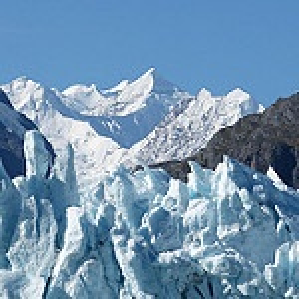

In [7]:
img

In [8]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [9]:
X = preprocess_input(X)

In [10]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [11]:
classes = [
    'buildings',
    'forest',
    'glacier',
    'mountain',
    'sea',
    'street'
]

In [12]:
dict(zip(classes, pred[0]))

{'buildings': np.float32(-4.325834),
 'forest': np.float32(-5.130693),
 'glacier': np.float32(5.366136),
 'mountain': np.float32(3.562033),
 'sea': np.float32(-5.8050013),
 'street': np.float32(-6.620419)}

### Test another example

In [13]:
path = '../data/seg_pred/seg_pred/11983.jpg'

In [14]:
img = load_img(path, target_size=(299, 299))

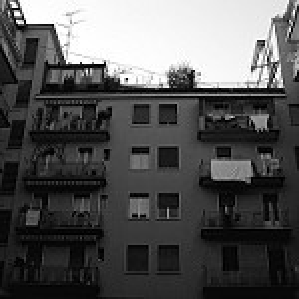

In [15]:
img

In [16]:
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)
pred = model.predict(X)

dict(zip(classes, pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


{'buildings': np.float32(8.08962),
 'forest': np.float32(-5.967691),
 'glacier': np.float32(-5.980655),
 'mountain': np.float32(-6.9744596),
 'sea': np.float32(-3.839117),
 'street': np.float32(2.618798)}

### Test with another image

In [17]:
path = '../data/seg_train/seg_train/buildings/10198.jpg'

In [18]:
img = load_img(path, target_size=(299, 299))

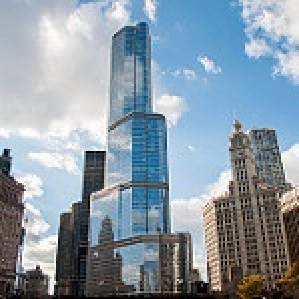

In [19]:
img

In [20]:
x = np.array(img)
X = np.array([x])

X = preprocess_input(X)
pred = model.predict(X)

dict(zip(classes, pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


{'buildings': np.float32(8.495714),
 'forest': np.float32(-6.7274966),
 'glacier': np.float32(-5.5335817),
 'mountain': np.float32(-4.868589),
 'sea': np.float32(-3.107923),
 'street': np.float32(1.2979363)}